# HW 5 

## ECGR 5105 - Summer 2024

#### Joshua Ayers

#### SID: 801083470

#### Professor: Vinit Katariya

#### Github: https://github.com/Jayers0/HW5_ECGR5105

In [1]:
import torch
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


## Part 1-A

In [2]:
# Define the model
def model(t_u, w1, w2, b):
    return w2 * t_u *t_u + w1 * t_u + b

In [3]:
# Generate sample data
t_u = torch.linspace(0, 1, 100)  # normalized input
t_c = t_u * 50  # target values (just for illustration)

# Initialize parameters
w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [4]:
# Define the loss function
def loss_fn(y, y_pred):
    return ((y - y_pred)**2).mean()

In [5]:



# Training loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    w1, w2, b = params
    optimizer = optim.SGD([w1, w2, b], lr=learning_rate)
    losses = []
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_c, t_p)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")
        
        losses.append(loss.item())
    
    return w1, w2, b, losses



Training with learning rate: 0.1
Epoch 500, Loss: 2.092132329940796
Epoch 1000, Loss: 1.1958385705947876
Epoch 1500, Loss: 0.683525800704956
Epoch 2000, Loss: 0.3906928300857544
Epoch 2500, Loss: 0.22331491112709045
Epoch 3000, Loss: 0.12764352560043335
Epoch 3500, Loss: 0.0729595273733139
Epoch 4000, Loss: 0.0417030043900013
Epoch 4500, Loss: 0.023837491869926453
Epoch 5000, Loss: 0.013625524938106537
Training with learning rate: 0.01
Epoch 500, Loss: 10.359099388122559
Epoch 1000, Loss: 3.6066951751708984
Epoch 1500, Loss: 2.9000680446624756
Epoch 2000, Loss: 2.700242519378662
Epoch 2500, Loss: 2.5499167442321777
Epoch 3000, Loss: 2.4109556674957275
Epoch 3500, Loss: 2.2798140048980713
Epoch 4000, Loss: 2.1558263301849365
Epoch 4500, Loss: 2.038583993911743
Epoch 5000, Loss: 1.9277185201644897
Training with learning rate: 0.001
Epoch 500, Loss: 107.3388442993164
Epoch 1000, Loss: 54.7601203918457
Epoch 1500, Loss: 41.64152908325195
Epoch 2000, Loss: 33.065040588378906
Epoch 2500, Los

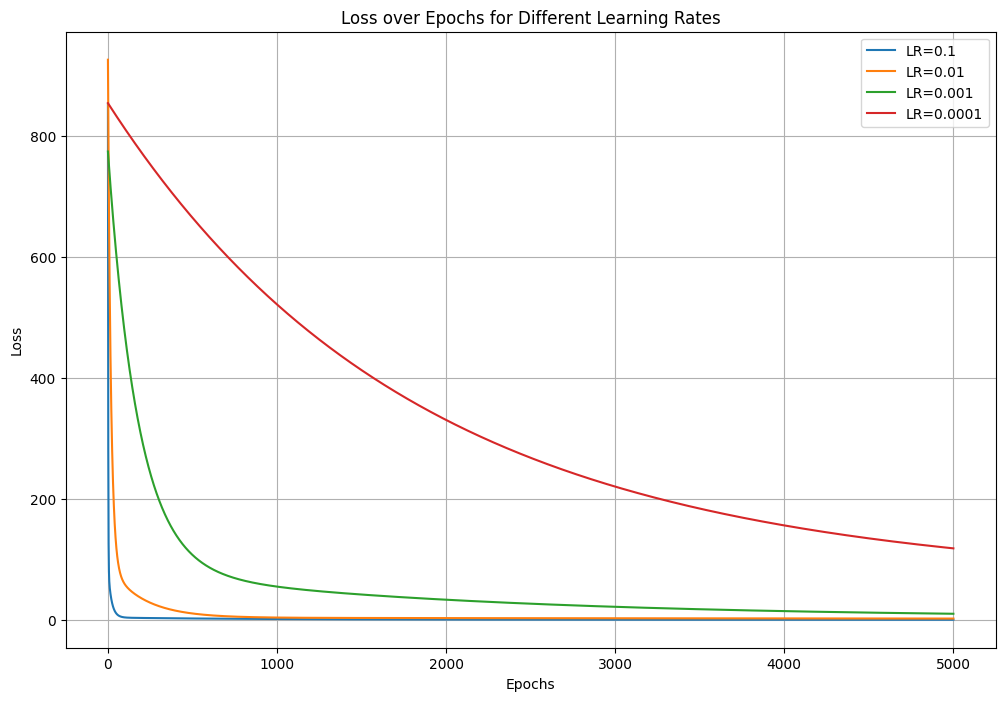

In [6]:
# Training for different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000

all_losses = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    w1, w2, b = torch.randn(1, requires_grad=True), torch.randn(1, requires_grad=True), torch.randn(1, requires_grad=True)
    w1, w2, b, losses = training_loop(n_epochs, lr, (w1, w2, b), t_u, t_c)
    all_losses[lr] = losses

# Plot the loss for each learning rate
plt.figure(figsize=(12, 8))
for lr, losses in all_losses.items():
    plt.plot(range(1, n_epochs + 1), losses, label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

As the graph above shows the learning rate of 0.0001 has the best performace. 

Training with learning rate: 0.0001
Epoch 500, Loss: 683.7823486328125
Epoch 1000, Loss: 536.34619140625
Epoch 1500, Loss: 424.6707763671875
Epoch 2000, Loss: 339.97613525390625
Epoch 2500, Loss: 275.6404724121094
Epoch 3000, Loss: 226.66998291015625
Epoch 3500, Loss: 189.29812622070312
Epoch 4000, Loss: 160.6841583251953
Epoch 4500, Loss: 138.6853485107422
Epoch 5000, Loss: 121.68592834472656


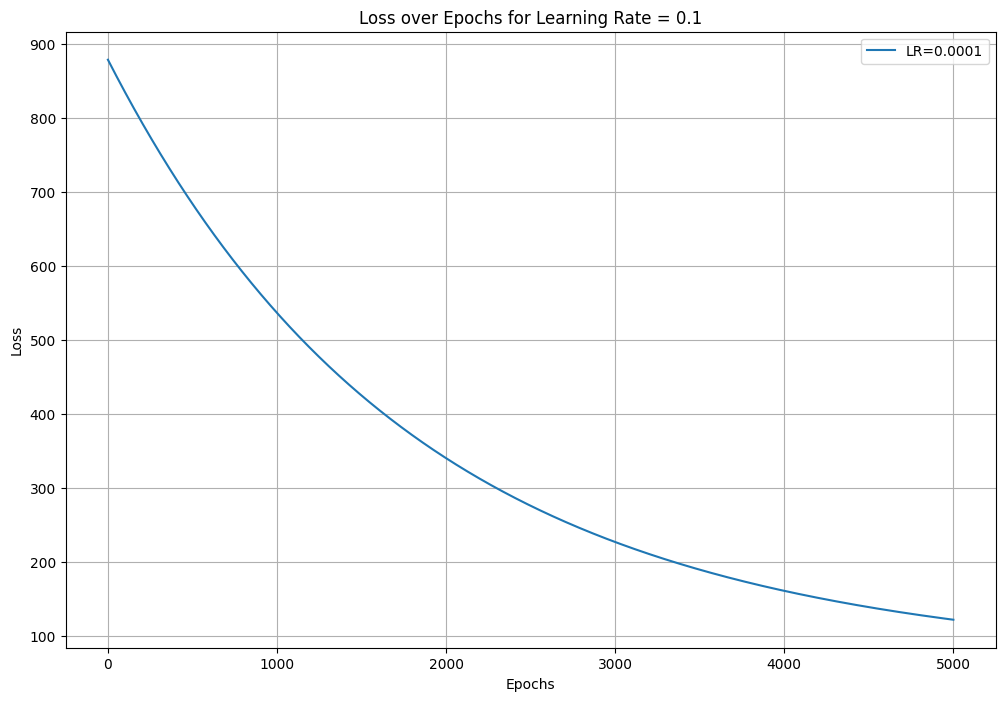

In [7]:
# Training for different learning rates
learning_rates = [0.1]
n_epochs = 5000

all_losses = {}

print(f"Training with learning rate: {lr}")
w1, w2, b = torch.randn(1, requires_grad=True), torch.randn(1, requires_grad=True), torch.randn(1, requires_grad=True)
w1, w2, b, losses = training_loop(n_epochs, lr, (w1, w2, b), t_u, t_c)
all_losses[lr] = losses

# Plot the loss for each learning rate
plt.figure(figsize=(12, 8))
for lr, losses in all_losses.items():
    plt.plot(range(1, n_epochs + 1), losses, label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Loss over Epochs for Learning Rate = {learning_rates[0]}')
plt.legend()
plt.grid(True)
plt.show()

## Part 1-B

In [8]:
# Linear model definition
def linear_model(t_u, w, b):
    return w * t_u + b

In [9]:
# Training loop for linear model
def linear_training_loop(n_epochs, learning_rate, params, t_u, t_c):
    w, b = params
    optimizer = optim.SGD([w, b], lr=learning_rate)
    for epoch in range(1, n_epochs + 1):
        t_p = linear_model(t_u, w, b)
        loss = loss_fn(t_c, t_p)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")
    
    return w, b


Training linear model
Epoch 500, Loss: 37.30825424194336
Epoch 1000, Loss: 9.750519752502441
Epoch 1500, Loss: 2.548304557800293
Epoch 2000, Loss: 0.6660038828849792
Epoch 2500, Loss: 0.17405188083648682
Epoch 3000, Loss: 0.04548761993646622
Epoch 3500, Loss: 0.011889036744832993
Epoch 4000, Loss: 0.0031071880366653204
Epoch 4500, Loss: 0.0008122356375679374
Epoch 5000, Loss: 0.000212378115975298


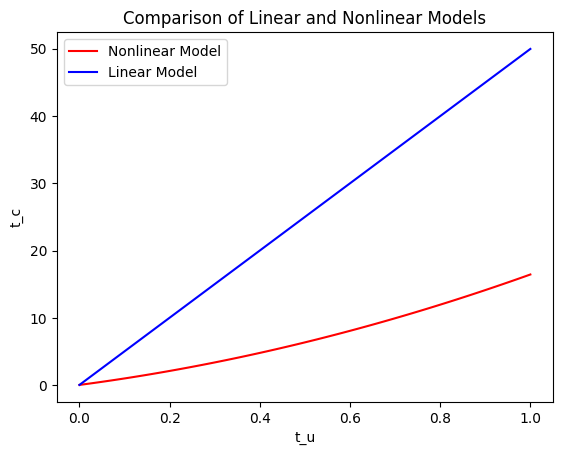

In [10]:



# Train the linear model
print("Training linear model")
w, b = torch.randn(1, requires_grad=True), torch.randn(1, requires_grad=True)
linear_training_loop(n_epochs, 0.01, (w, b), t_u, t_c)

# Plotting the results
import matplotlib.pyplot as plt

# Plot the dataset
#plt.scatter(t_u, t_c, label='Data')

# Plot the best nonlinear model
t_p_nonlinear = model(t_u, w1, w2, b)  # assuming w1, w2, b are the best parameters
plt.plot(t_u.detach().numpy(), t_p_nonlinear.detach().numpy(), label='Nonlinear Model', color='red')

# Plot the linear model
t_p_linear = linear_model(t_u, w, b)  # assuming w, b are the parameters of linear model
plt.plot(t_u.detach().numpy(), t_p_linear.detach().numpy(), label='Linear Model', color='blue')

plt.legend()
plt.xlabel('t_u')
plt.ylabel('t_c')
plt.title('Comparison of Linear and Nonlinear Models')
plt.show()


# Problem 2

Load the data

In [11]:

data = pd.read_csv('Data/Housing.csv')


In [12]:
# Features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']


In [13]:
X_scaled =StandardScaler().fit_transform(X)


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Problem 2-B

Define learning rates and training epochs

In [15]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5000
report_interval = 500

results = {}

In [16]:
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1, tol=None, random_state=42)
    
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.partial_fit(X_train, y_train)
        
        # Calculate training loss
        train_pred = model.predict(X_train)
        train_loss = mean_squared_error(y_train, train_pred)
        train_losses.append(train_loss)
        
        # Calculate validation loss
        val_pred = model.predict(X_val)
        val_loss = mean_squared_error(y_val, val_pred)
        val_losses.append(val_loss)
        
        # Print loss every report_interval epochs
        if (epoch + 1) % report_interval == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        

    # Calculate final R^2 score on validation set
    final_val_pred = model.predict(X_val)
    final_r2 = r2_score(y_val, final_val_pred)

    results[lr] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'r2_score': final_r2
    }


Training with learning rate: 0.1
Epoch 500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 1000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 1500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 2000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 2500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 3000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 3500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 4000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 4500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 5000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787

Training with learning rate: 0.01
Epoch 500/5000, Train Loss: 1370823248389.5959, Val Loss: 2255210166860.7739
Epoch 1000/5000, Train Loss: 1370823248389.5959, Val Loss: 2255210166860.77

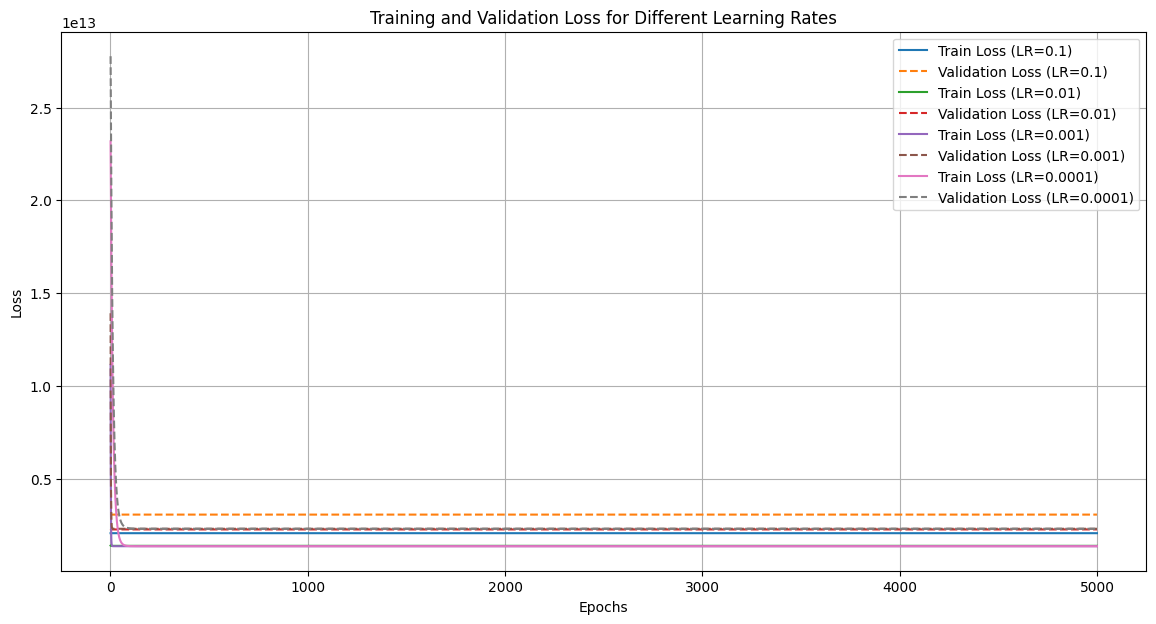

In [17]:
# Plotting the results
plt.figure(figsize=(14, 7))

for lr in learning_rates:
    plt.plot(range(1, epochs + 1), results[lr]['train_losses'], label=f'Train Loss (LR={lr})')
    plt.plot(range(1, epochs + 1), results[lr]['val_losses'], linestyle='dashed', label=f'Validation Loss (LR={lr})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Find the best model
best_lr = max(results, key=lambda k: results[k]['r2_score'])
print(f"\nBest learning rate: {best_lr}")
print(f"Validation R^2 Score: {results[best_lr]['r2_score']:.4f}")

# Print loss every 500 epochs for the best model
for epoch in range(0, epochs, report_interval):
    print(f"Epoch {epoch + 1}: Train Loss = {results[best_lr]['train_losses'][epoch]:.4f}, Val Loss = {results[best_lr]['val_losses'][epoch]:.4f}")


Best learning rate: 0.01
Validation R^2 Score: 0.5538
Epoch 1: Train Loss = 1384696169991.2700, Val Loss = 2271928245560.9224
Epoch 501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 1001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 1501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 2001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 2501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 3001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 3501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 4001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 4501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739


# Problem 3

### Problem 3-A

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
X = data.drop(columns=['price'])
y = data['price']

In [21]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()


In [22]:
numerical_transformer = StandardScaler()


In [23]:
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')


In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
# Define the model
model = SGDRegressor(max_iter=1, tol=None, random_state=42)

# Create and compile the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

### Problem 3-B

In [27]:
results = {}
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1, tol=None, random_state=42)
    
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.partial_fit(X_train, y_train)
        
        # Calculate training loss
        train_pred = model.predict(X_train)
        train_loss = mean_squared_error(y_train, train_pred)
        train_losses.append(train_loss)
        
        # Calculate validation loss
        val_pred = model.predict(X_val)
        val_loss = mean_squared_error(y_val, val_pred)
        val_losses.append(val_loss)
        
        # Print loss every report_interval epochs
        if (epoch + 1) % report_interval == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Calculate final R^2 score on validation set
    final_val_pred = model.predict(X_val)
    final_r2 = r2_score(y_val, final_val_pred)

    results[lr] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'r2_score': final_r2
    }


Training with learning rate: 0.1


Epoch 500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 1000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 1500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 2000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 2500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 3000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 3500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 4000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 4500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 5000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787

Training with learning rate: 0.01
Epoch 500/5000, Train Loss: 1370823248389.5959, Val Loss: 2255210166860.7739
Epoch 1000/5000, Train Loss: 1370823248389.5959, Val Loss: 2255210166860.7739
Epoch 1500/5000, Train Loss: 13

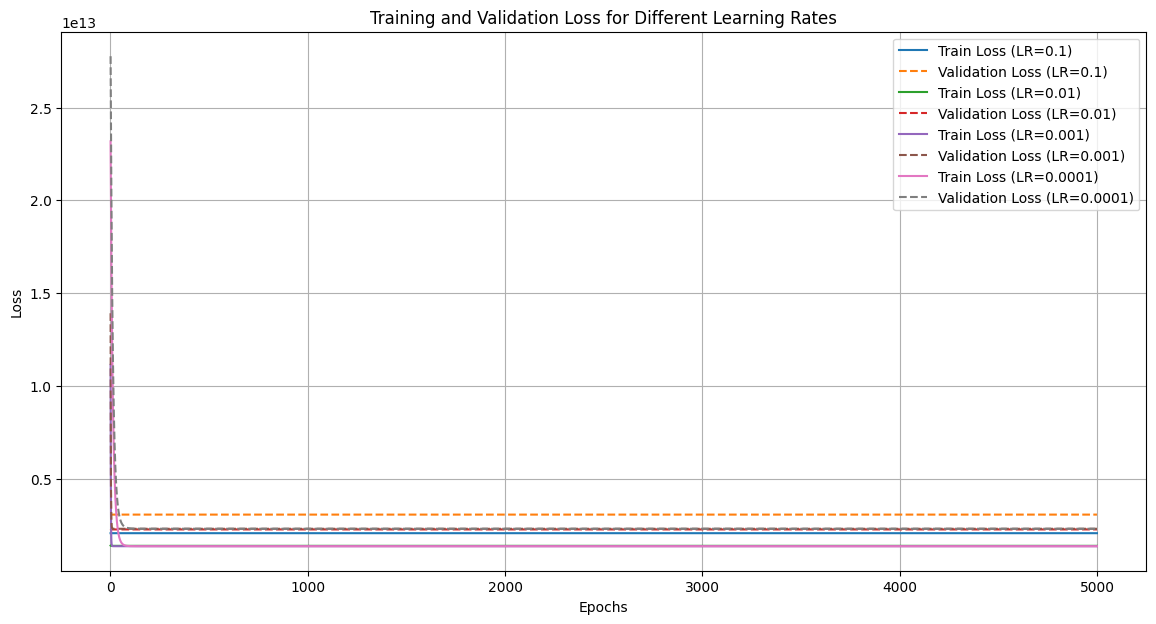

In [28]:
# Plotting the results
plt.figure(figsize=(14, 7))

for lr in learning_rates:
    plt.plot(range(1, epochs + 1), results[lr]['train_losses'], label=f'Train Loss (LR={lr})')
    plt.plot(range(1, epochs + 1), results[lr]['val_losses'], linestyle='dashed', label=f'Validation Loss (LR={lr})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

### Problem 3-C

In [29]:
# Find the best model
best_lr = max(results, key=lambda k: results[k]['r2_score'])
print(f"\nBest learning rate: {best_lr}")
print(f"Validation R^2 Score: {results[best_lr]['r2_score']:.4f}")

# Print loss every 500 epochs for the best model
for epoch in range(0, epochs, report_interval):
    print(f"Epoch {epoch + 1}: Train Loss = {results[best_lr]['train_losses'][epoch]:.4f}, Val Loss = {results[best_lr]['val_losses'][epoch]:.4f}")



Best learning rate: 0.01
Validation R^2 Score: 0.5538
Epoch 1: Train Loss = 1384696169991.2700, Val Loss = 2271928245560.9224
Epoch 501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 1001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 1501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 2001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 2501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 3001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 3501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 4001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 4501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
